In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Importing the data from kaggle repository

In [3]:
dir='/kaggle/input/brain-mri-images-for-brain-tumor-detection'
import tensorflow as tf
import h5py
import numpy as np
import os
import cv2
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler
%config Completer.use_jedi = False

In [4]:
x_dataset = []
y_dataset = []
src = os.listdir(r"C:\Users\ishra\Downloads\VS Code\brain tumour project\brain_tumour_dataset\no")
i = 0
for filename in src:
    full_file_name = (
        r"C:\Users\ishra\Downloads\VS Code\brain tumour project\brain_tumour_dataset\no" + filename
    )
    x = cv2.imread(full_file_name)
    x = np.array(x, dtype="float32")
    y = 0
    y = np.array(y, dtype="float32")
    x = x / 255.0
    x = cv2.resize(x, (224, 224))
    x_dataset.append(x)
    y_dataset.append(y)
    i = i + 1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [5]:
src = os.listdir(
    r"C:\Users\ishra\Downloads\VS Code\brain tumour project\brain_tumour_dataset\yes"
)

for filename in src:
    full_file_name = (

        r"C:\Users\ishra\Downloads\VS Code\brain tumour project\brain_tumour_dataset\yes" + filename
    )

    x = cv2.imread(full_file_name)

    x = np.array(x, dtype="float32")

    y = 1

    y = np.array(y, dtype="float32")

    x = x / 255.0

    x = cv2.resize(x, (224, 224))
    x_dataset.append(x)
    y_dataset.append(y)

    i = i + 1
    print(i)

1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700


In [6]:
X_dataset = np.array(x_dataset)
Y_dataset = np.array(y_dataset)
Y_dataset = Y_dataset.reshape((3000, 1))

In [7]:
# Now shuffling the whole dataset such that samples get mixed

In [8]:
from sklearn.utils import shuffle

X_dataset, Y_dataset = shuffle(X_dataset, Y_dataset, random_state=0)

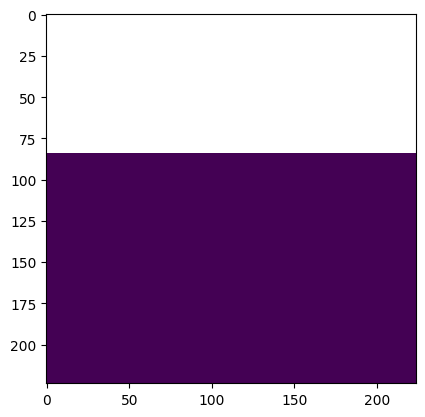

In [9]:
import matplotlib.pyplot as plt

plt.imshow(X_dataset[2])
plt.show()

In [10]:
yes_len = 0
no_len = 0
for i in range(3000):
    if Y_dataset[i] == 0:
        no_len += 1
    else:
        yes_len += 1
print(yes_len)
print(no_len)

1500
1500


<Axes: >

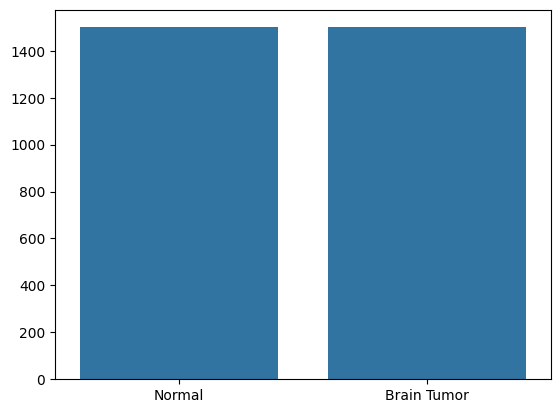

In [11]:
import seaborn as sns

sns.barplot(x=["Normal", "Brain Tumor"], y=[no_len, yes_len])

In [12]:
# Breakdown in Train and Test set

In [13]:
 from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_dataset,Y_dataset,test_size=0.20)

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

folds = list(StratifiedShuffleSplit(n_splits=5, random_state=1).split(x_train, y_train))

In [15]:
nasnet = tf.keras.applications.inception_v3.InceptionV3(
    include_top=False, input_shape=(224, 224, 3)
)

x = tf.keras.layers.Flatten()(nasnet.output)
x = tf.keras.layers.Dense(1)(x)
out = tf.keras.layers.Activation(activation="sigmoid")(x)

model = tf.keras.Model(inputs=nasnet.input, outputs=out)

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [16]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 21,853,985 (83.37 MB)

 Trainable params: 21,819,553 (83.23 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [17]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc, roc_curve
from matplotlib import pyplot as plt

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.03,
    height_shift_range=0.03,
    shear_range=0.25,
    zoom_range=0.45,
    horizontal_flip=True,
)

val_datagen = ImageDataGenerator(zoom_range=0.45)

In [19]:
train_data_dir = "train"
val_data_dir = "val"
for j, (train_idx, val_idx) in enumerate(folds):
    print("Fold " + str(j + 1))

    x_train = X_dataset[train_idx]
    y_train = Y_dataset[train_idx]
    x_val = X_dataset[val_idx]
    y_val = Y_dataset[val_idx]
    train_generator = train_datagen.flow_from_directory(
    directory=train_data_dir,
    batch_size=3000, 
    steps_per_epoch=len(os.listdir(train_data_dir)) // 3000,
)

validation_generator = val_datagen.flow_from_directory(
    directory=val_data_dir,
    batch_size=2160,
    steps_per_epoch=len(os.listdir(val_data_dir)) // 2160,
)

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
)
y_predict = model.predict(x_val)
Y_predict = np.float32(y_predict > 0.50)
l = len(y_val)
Y_predict = np.reshape(Y_predict, (l, 1))
prescore = precision_score(y_val, Y_predict, average="binary")
recaller = recall_score(y_val, Y_predict, average="binary")
score = f1_score(y_val, Y_predict, average="binary")
sensitivity = sensitivity_specificity_support(y_val, Y_predict, average="binary")
print("Precision: ", prescore)
print("Recall: ", recaller)
print("F1-score ", score)
print("Sensitivity ", sensitivity)
History.append(history)
Prescore.append(prescore)
F1.append(score)
Recall.append(recaller)
Sensspeci.append(sensitivity)
fpr, tpr, thresholds = roc_curve(y_val, y_predict)
auc = roc_auc_score(y_val, y_predict)
print("Precision: ", prescore)
print("Recall: ", recaller)
print("F1-score ", score)
print("Sensitivity ", sensitivity)
print("AUC: ", auc)
plt.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
plt.plot(fpr, tpr, marker=".", label="XceptionNet")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Fold 1


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'train'

In [ ]:
val_acc = History[0].history["val_accuracy"]
val_acc1 = History[1].history["val_accuracy"]
val_acc2 = History[2].history["val_accuracy"]
val_acc3 = History[3].history["val_accuracy"]
val_acc4 = History[4].history["val_accuracy"]
Accuracvalid1 = val_acc[19]
Accuracyvalid2 = val_acc1[19]
Accuracyvalid3 = val_acc2[19]
Accuracyvalid4 = val_acc3[19]
Accuracyvalid5 = val_acc4[19]
Mean_valid_Accuracy = (
    Accuracvalid1 + Accuracyvalid2 + Accuracyvalid3 + Accuracyvalid4 + Accuracyvalid5
) / 5.00
print("validation Accuracy for Fold-1 ", Accuracvalid1)
print("validation Accuracy for Fold-2", Accuracyvalid2)
print("Validation Accuracy for Fold-3 ", Accuracyvalid3)
print("Validation Accuracy for Fold-4  ", Accuracyvalid4)
print("Validation Accuracy for Fold-5  ", Accuracyvalid5)
print("Mean Validation Accuracy ", Mean_valid_Accuracy)

In [ ]:
x_test.shape

In [ ]:
y_predict1 = model.predict(x_test)
predict = np.float32(y_predict1 > 0.50)
predict = np.reshape(predict, (51, 1))
print(predict)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
metrics = confusion_matrix(y_test, predict)
print(metrics)

In [ ]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_predict1)
auc = roc_auc_score(y_test, y_predict1)

In [ ]:
print(auc)

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic for Breast Cancer Classification")
plt.legend(loc="lower right")
plt.show()